In [2]:
import urllib.request

dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz"
file_path = "HIGGS.csv.gz"

print("Downloading the HIGGS dataset... This may take a while.")
urllib.request.urlretrieve(dataset_url, file_path)
print("Download complete! File saved as HIGGS.csv.gz.")

Download complete! File saved as HIGGS.csv.gz.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import time

In [4]:
# Load CSV file
df = pd.read_csv('HIGGS.csv')

# Display the first few rows
print(df.head())

   1.000000000000000000e+00  8.692932128906250000e-01  \
0                       1.0                  0.907542   
1                       1.0                  0.798835   
2                       0.0                  1.344385   
3                       1.0                  1.105009   
4                       0.0                  1.595839   

   -6.350818276405334473e-01  2.256902605295181274e-01  \
0                   0.329147                  0.359412   
1                   1.470639                 -1.635975   
2                  -0.876626                  0.935913   
3                   0.321356                  1.522401   
4                  -0.607811                  0.007075   

   3.274700641632080078e-01  -6.899932026863098145e-01  \
0                  1.497970                  -0.313010   
1                  0.453773                   0.425629   
2                  1.992050                   0.882454   
3                  0.882808                  -1.205349   
4                 

In [5]:
columns = ['process', 'lepton_pT', 'lepton_eta', 'lepton_phi', 'missing_energy_magnitude', 'missing_energy_phi', 'jet_1_pt', 'jet_1_eta', 'jet_1_phi', 'jet_1_b_tag', 'jet_2_pt', 'jet_2_eta', 'jet_2_phi', 'jet_2_b_tag', 'jet_3_pt', 'jet_3_eta', 'jet_3_phi', 'jet_3_b_tag', 'jet_4_pt', 'jet_4_eta', 'jet_4_phi', 'jet_4_b_tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']
df.columns = columns

In [6]:
print("Data shape:", df.shape)


Data shape: (10999999, 29)


In [7]:
df.isnull().sum().sum()


0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999999 entries, 0 to 10999998
Data columns (total 29 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   process                   float64
 1   lepton_pT                 float64
 2   lepton_eta                float64
 3   lepton_phi                float64
 4   missing_energy_magnitude  float64
 5   missing_energy_phi        float64
 6   jet_1_pt                  float64
 7   jet_1_eta                 float64
 8   jet_1_phi                 float64
 9   jet_1_b_tag               float64
 10  jet_2_pt                  float64
 11  jet_2_eta                 float64
 12  jet_2_phi                 float64
 13  jet_2_b_tag               float64
 14  jet_3_pt                  float64
 15  jet_3_eta                 float64
 16  jet_3_phi                 float64
 17  jet_3_b_tag               float64
 18  jet_4_pt                  float64
 19  jet_4_eta                 float64
 20  jet_4_phi             

In [10]:
df.mean().head()    # Compute mean of first few columns
df.std().head()     # Compute standard deviation
df.min().head()     # Minimum values
df.max().head()     # Maximum values

process                      1.000000
lepton_pT                   12.098914
lepton_eta                   2.434868
lepton_phi                   1.743236
missing_energy_magnitude    15.396821
dtype: float64

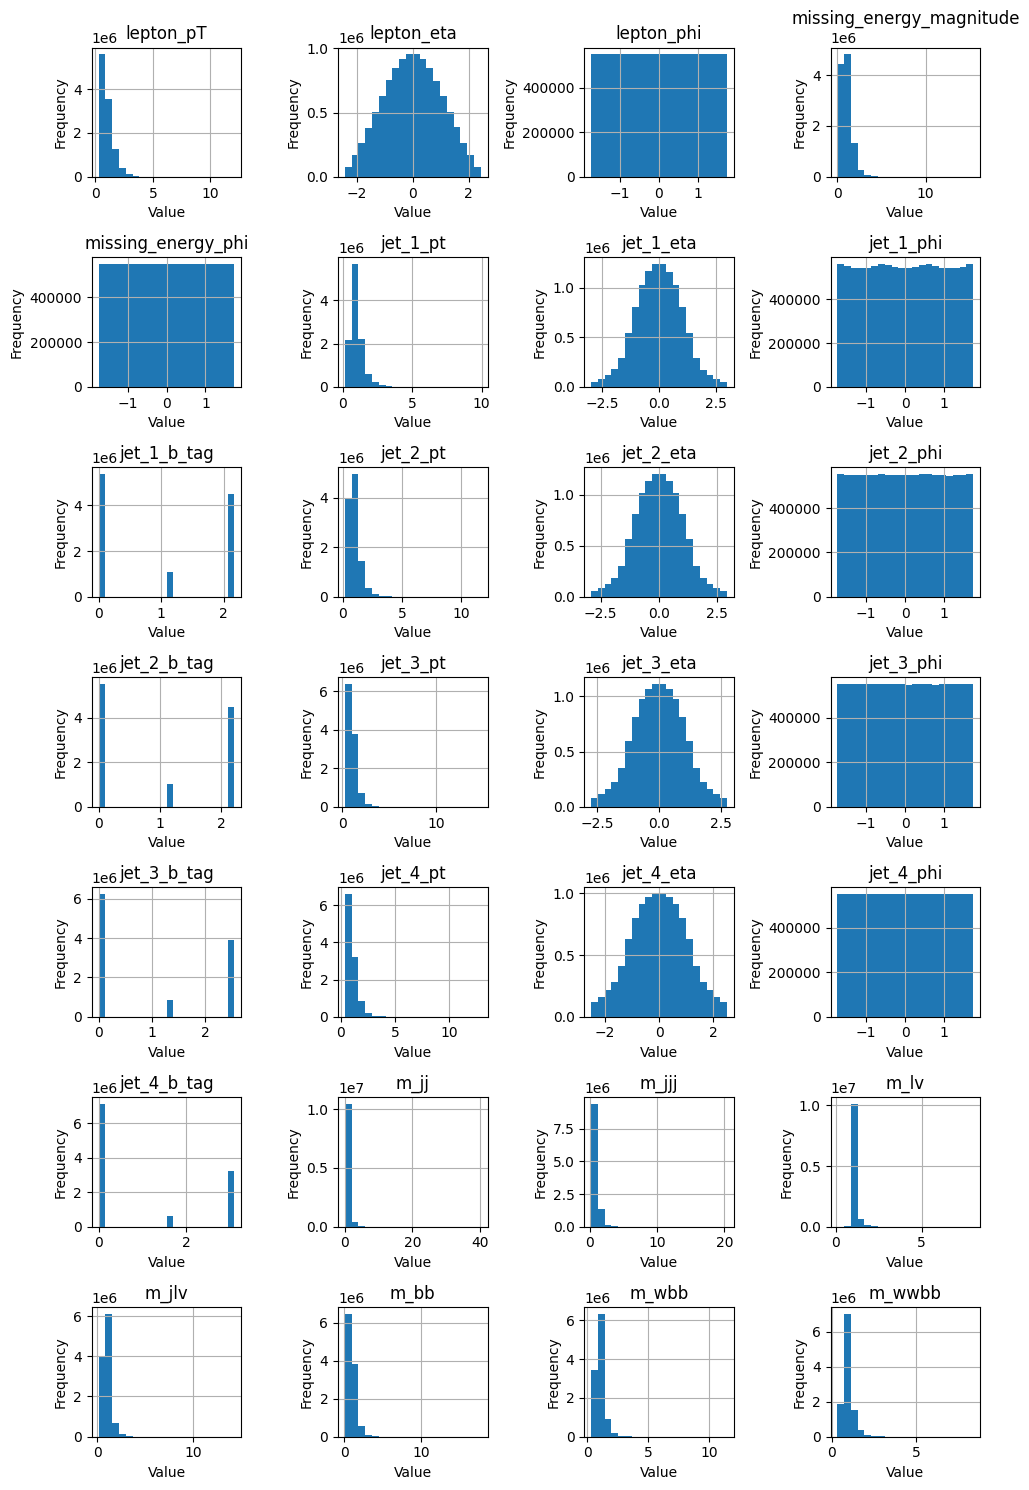

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


# Define column names (excluding the label column)
columns = ['lepton_pT', 'lepton_eta', 'lepton_phi', 
           'missing_energy_magnitude', 'missing_energy_phi', 
           'jet_1_pt', 'jet_1_eta', 'jet_1_phi', 'jet_1_b_tag', 
           'jet_2_pt', 'jet_2_eta', 'jet_2_phi', 'jet_2_b_tag', 
           'jet_3_pt', 'jet_3_eta', 'jet_3_phi', 'jet_3_b_tag', 
           'jet_4_pt', 'jet_4_eta', 'jet_4_phi', 'jet_4_b_tag', 
           'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

# Plot histograms for all features
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(10, 15))
axes = axes.flatten()

# Generate histograms for each feature and add labels
for i, col in enumerate(df.iloc[:, 1:].columns):
    df[col].hist(bins=20, ax=axes[i])
    axes[i].set_title(columns[i], fontsize=12)  # Set feature name as title
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()

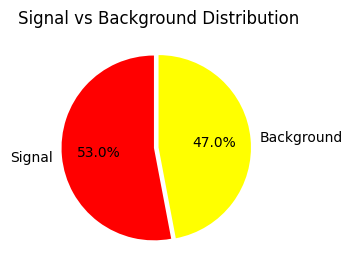

In [12]:
# Compute the percentage of signal (process == 1.00) and background
signal_dist = round((df.query('process == 1.00').shape[0] / df.shape[0]) * 100, 2)
bckgrnd_dist = 100 - signal_dist

# Plot Pie Chart
plt.figure(figsize=(3,3))
plt.pie([signal_dist, bckgrnd_dist], labels=['Signal', 'Background'], 
        startangle=90, autopct='%1.1f%%', colors=['red', 'yellow'], explode=[0.05, 0])
plt.title("Signal vs Background Distribution")
plt.show()

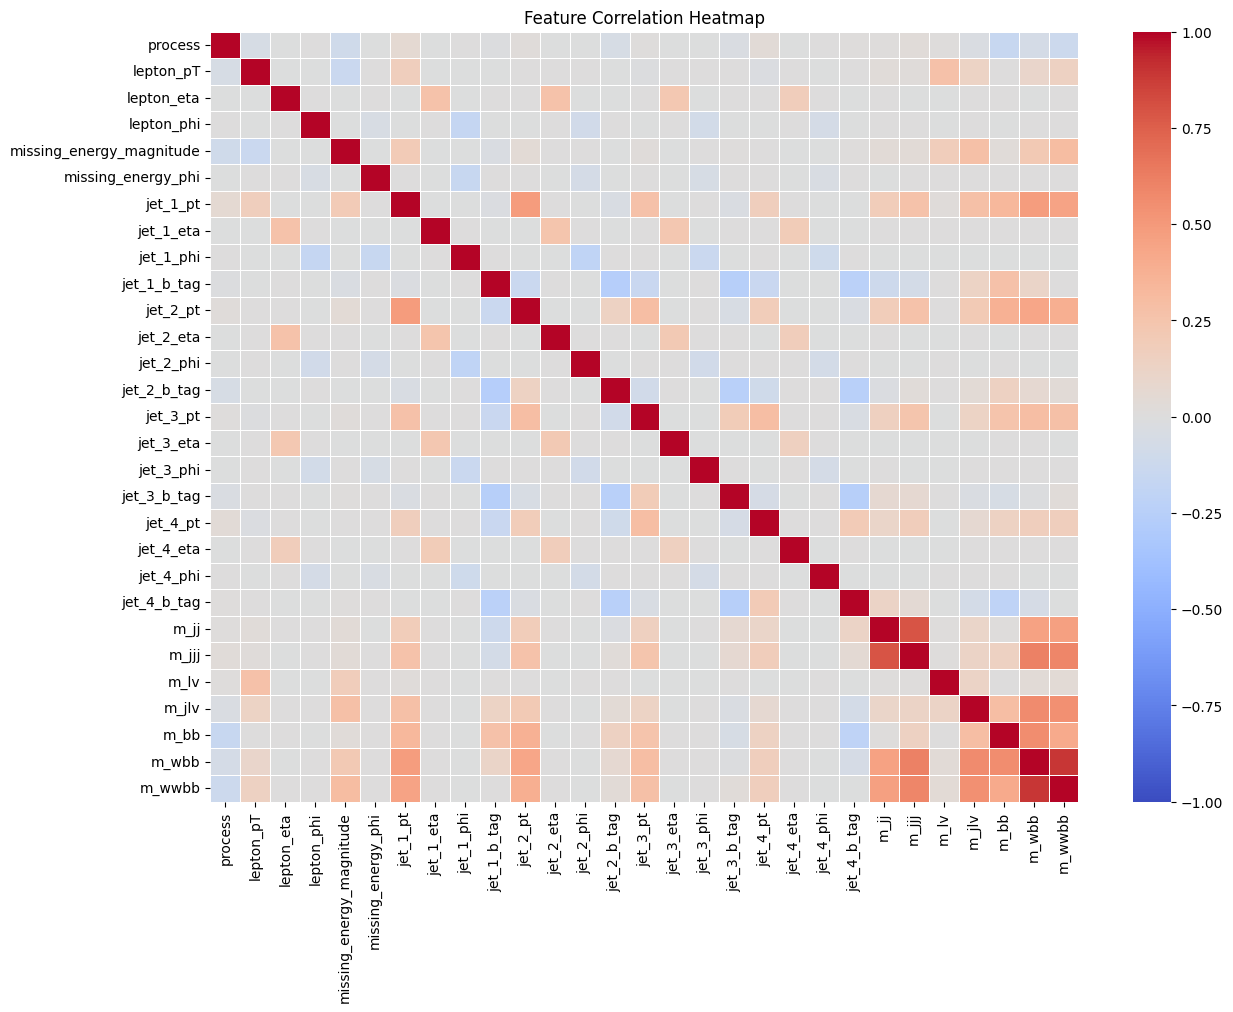

In [13]:
import seaborn as sns

# Compute correlation matrix
correlation_matrix = df.corr()

# Set up the figure size
plt.figure(figsize=(14, 10))

# Generate heatmap with annotations
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)

# Set title
plt.title("Feature Correlation Heatmap")

# Show the plot
plt.show()

In [14]:
# Extract the upper triangle of the correlation matrix (excluding diagonal)
corr_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find the highest correlated feature pairs
high_corr_pairs = corr_matrix.unstack().sort_values(ascending=False)

# Display the top correlated features
print(high_corr_pairs.head(5))

m_wwbb  m_wbb    0.895267
m_jjj   m_jj     0.795835
m_wbb   m_jjj    0.613328
m_wwbb  m_jjj    0.589181
m_wbb   m_jlv    0.566684
dtype: float64


In [15]:
# Define function to detect outliers using the IQR method
def find_outliers_iqr(dataframe):
    outlier_dict = {}
    for column in dataframe.columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outlier_count = ((dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)).sum()
        outlier_dict[column] = outlier_count

    return pd.DataFrame.from_dict(outlier_dict, orient='index', columns=['Outlier Count'])

# Compute outliers for each feature
outliers_df = find_outliers_iqr(df)

# Display the table of outlier counts
from IPython.display import display
display(outliers_df)

,Outlier Count
process,0
lepton_pT,429914
lepton_eta,0
lepton_phi,0
missing_energy_magnitude,325478
missing_energy_phi,0
jet_1_pt,544742
jet_1_eta,69639
jet_1_phi,0
jet_1_b_tag,0


In [16]:
# Remove highly correlated features 'm_wbb' and 'm_jjj'
df = df.drop(columns=['m_wbb', 'm_jjj'])

# Display updated dataset structure
from IPython.display import display
display(df.head())

,process,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b_tag,...,jet_3_b_tag,jet_4_pt,jet_4_eta,jet_4_phi,jet_4_b_tag,m_jj,m_lv,m_jlv,m_bb,m_wwbb
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,0.000000,0.398701,-1.138930,-0.000819,0.000000,0.302220,0.985700,0.978098,0.779732,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,2.548224,1.256955,1.128848,0.900461,0.000000,0.909753,0.985692,0.951331,0.803252,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,0.000000,0.745313,-0.678379,-1.360356,0.000000,0.946652,0.998656,0.728281,0.869200,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,0.000000,0.479999,-0.373566,0.113041,0.000000,0.755856,0.986610,0.838085,1.133295,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,0.000000,0.651114,-0.654227,-1.274345,3.101961,0.823761,0.971758,0.789176,0.430553,0.957818


In [17]:
# Define function to remove extreme outliers using the IQR method with a wider range
def remove_outliers_from_list(dataframe, outliers_df, factor=3.0):
    """
    Removes extreme outliers based on a modified IQR method using the provided outliers count.
    factor=3.0 ensures we remove only extreme outliers while preserving more data.
    """
    df_cleaned = dataframe.copy()
    
    for column in outliers_df.index:
        if outliers_df.loc[column, 'Outlier Count'] > 0:  # Process only columns with outliers
            Q1 = dataframe[column].quantile(0.25)
            Q3 = dataframe[column].quantile(0.75)
            IQR = Q3 - Q1

            # Define modified outlier bounds (factor=3.0 instead of 1.5)
            lower_bound = Q1 - factor * IQR
            upper_bound = Q3 + factor * IQR

            # Remove extreme outliers
            df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

# Recompute outliers_df if not available
def find_outliers_iqr(dataframe):
    outlier_dict = {}
    for column in dataframe.columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the number of outliers
        outlier_count = ((dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)).sum()
        outlier_dict[column] = outlier_count

    return pd.DataFrame.from_dict(outlier_dict, orient='index', columns=['Outlier Count'])

# Recompute outliers dataframe
outliers_df = find_outliers_iqr(df)

# Apply outlier removal based on outliers_df
df_pandas_cleaned = remove_outliers_from_list(df, outliers_df, factor=3.0)

# Display the cleaned dataset
from IPython.display import display
display(df_pandas_cleaned.head())

,process,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b_tag,...,jet_3_b_tag,jet_4_pt,jet_4_eta,jet_4_phi,jet_4_b_tag,m_jj,m_lv,m_jlv,m_bb,m_wwbb
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,0.000000,0.398701,-1.138930,-0.000819,0.000000,0.302220,0.985700,0.978098,0.779732,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,2.548224,1.256955,1.128848,0.900461,0.000000,0.909753,0.985692,0.951331,0.803252,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,0.000000,0.745313,-0.678379,-1.360356,0.000000,0.946652,0.998656,0.728281,0.869200,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,0.000000,0.479999,-0.373566,0.113041,0.000000,0.755856,0.986610,0.838085,1.133295,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,0.000000,0.651114,-0.654227,-1.274345,3.101961,0.823761,0.971758,0.789176,0.430553,0.957818


In [18]:
print("Clean Data shape:", df_pandas_cleaned.shape)

Clean Data shape: (8168792, 27)


In [19]:
from sklearn.model_selection import train_test_split


# Separate features (X) and label (y)
y = df_pandas_cleaned.iloc[:, 0]  # First column as label
X = df_pandas_cleaned.iloc[:, 1:]  # Remaining columns as features

# Split into training (70%) and remaining (30%)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42)

# Split remaining data into validation (10%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=2/3, random_state=42)  # 2/3 of 30% = 20%

# Print dataset shapes
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (5718154, 26) (5718154,)
Validation set: (816879, 26) (816879,)
Test set: (1633759, 26) (1633759,)


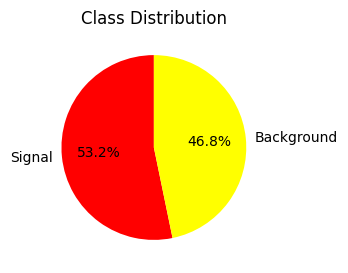

In [20]:

# Calculate class distribution
signal_dist = round((pd.DataFrame(y_train).query('process == 1').shape[0] / y_train.shape[0]) * 100, 2)
bckgrnd_dist = 100 - signal_dist

# Plot class distribution as a pie chart
plt.figure(figsize=(3,3))
plt.pie([signal_dist, bckgrnd_dist], labels=['Signal', 'Background'], startangle=90, autopct='%1.1f%%', colors=['red', 'yellow'])
plt.title("Class Distribution")
plt.show()


In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
from imblearn.over_sampling import SMOTE



# Apply SMOTE to training set
nn = NearestNeighbors(n_neighbors=3, n_jobs=-1)
smote = SMOTE(k_neighbors=nn, sampling_strategy='minority', random_state=42)  # Default SMOTE settings
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print new class distribution
print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", pd.Series(y_train_resampled).value_counts())


Before SMOTE:
 process
1.0    3044466
0.0    2673688
Name: count, dtype: int64

After SMOTE:
 process
0.0    3044466
1.0    3044466
Name: count, dtype: int64


In [26]:


# Convert resampled data to Pandas DataFrames (only if needed)
X_train = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train = pd.DataFrame(y_train_resampled, columns=['process'])


In [ ]:
import os

def export_data_sets(prefix=''):
    if prefix != '':
        prefix += '-'
    
    # Ensure 'datasets' directory exists
    os.makedirs('./datasets', exist_ok=True)

    print('Exporting training set...', end='')
    X_train.to_csv(f'./datasets/{prefix}X_train.csv', index=False)
    y_train.to_csv(f'./datasets/{prefix}y_train.csv', index=False)
    print('Done!')

    print('Exporting validation set...', end='')
    X_val.to_csv(f'./datasets/{prefix}X_val.csv', index=False)
    y_val.to_csv(f'./datasets/{prefix}y_val.csv', index=False)  
    print('Done!')

    print('Exporting test set...', end='')
    X_test.to_csv(f'./datasets/{prefix}X_test.csv', index=False)
    y_test.to_csv(f'./datasets/{prefix}y_test.csv', index=False)  
    print('Done!')


In [31]:

export_data_sets(prefix="resam") 

Exporting training set...Done!
Exporting validation set...Done!
Exporting test set...Done!


In [33]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler().fit(X_train) 
X_train = normalizer.transform(X_train)
X_val = normalizer.transform(X_val)
X_test = normalizer.transform(X_test)


In [32]:
from sklearn.preprocessing import StandardScaler

# Initialize and fit the normalizer
scaler = StandardScaler().fit(X_train)

# Transform datasets
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [40]:
columns_fixed = columns[1:X_train.shape[1] + 1]  # Ensures correct length
X_train = pd.DataFrame(X_train, columns=columns_fixed)
X_val = pd.DataFrame(X_val, columns=columns_fixed)
X_test = pd.DataFrame(X_test, columns=columns_fixed)


In [43]:
print(f"X_train shape: {X_train.shape}")  
print(f"Number of columns in X_train: {len(X_train.columns)}")  
print(f"Columns count in columns_fixed: {len(columns_fixed)}")  


X_train shape: (6088932, 26)
Number of columns in X_train: 26
Columns count in columns_fixed: 26


In [44]:
export_data_sets()


Exporting training set...Done!
Exporting validation set...Done!
Exporting test set...Done!
